In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean.csv')
df = df[["Code_produit", "Secteur", "Ingrédient"]]
df.head()

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,lait_ecreme_reconstitue
1,450,Produits laitiers et desserts frais,sucre
2,450,Produits laitiers et desserts frais,fruit
3,450,Produits laitiers et desserts frais,creme
4,450,Produits laitiers et desserts frais,epaississants


In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean.csv')
#df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Code_produit,Secteur,abricot,abricot ambi,abricot bas,abricot bas concentr,abricot confitur,abricot frais,abricot pech,abricot pomm,...,yaourt maigr,yaourt natur,yaourt natur lait,yaourt natur yaourt,yaourt sucr,yaourt sucr aromatis,yopl,zero,zest,zest citron
0,450,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Code_produit,Secteur,abeille,abondance,abricot,acacia,accompagnement,accra,acerola,acesulfame,...,xere,xiu,xylose,yaourt,yoghourt,yogourt,yuzu,zeste,zinc,zygochlamy
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_new = df.groupby(['Code_produit', 'Secteur'])['Ingrédient'].agg(lambda col: ' '.join(col)).reset_index(name='Ingrédient')

from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(token_pattern='\\b(\\w+[\\.,%_1234567890:()]?\\w+)\\b')
count_matrix = coun_vect.fit_transform(df_new['Ingrédient'])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df_new[["Code_produit", "Secteur"]], df_vect], axis=1)
new_df = new_df.drop(['_ananas', '_b1,_b9', '_b1,_b9_et_provitamine_a', '_b12', '_caillettes_de_boeuf_en_proportions_naturelles', '_carotte,_potiron_et_spiruline', '_d_avoine,_de_riz_et_d_epeautre', '_d_orge_et_de_riz', '_de_cassis_et_de_mure', '_de_cuivre', '_de_cuivre_et_de_manganese', '_de_matiere_grasse', '_de_matieres_grasses_au_lait_demi_ecreme_pasteurise', '_de_mg', '_de_thym,_de_laurier', '_e', '_gr', '_lb.rhamnosus', '_maigre_de_tete,_viande_et_couenne_de_porc', '_mg', '_paprika', '_provitamine_a', '_rooibos_et_du_melange_de_13_plantes_ricola', '_tournesol', '_vanille'], axis=1)

In [5]:
new_df = df

In [6]:
new_df.head()
y = new_df[["Secteur"]]
df_features = new_df.drop(["Code_produit", "Secteur"], axis=1)
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [17]:
new_df.head()

,Code_produit,Secteur,abeille,abondance,abricot,acacia,accompagnement,accra,acerola,acesulfame,...,xere,xiu,xylose,yaourt,yoghourt,yogourt,yuzu,zeste,zinc,zygochlamy
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df=2)
bag_of_words = count_vectorizer.fit_transform(df['Ingrédient'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

MemoryError: Unable to allocate 137. GiB for an array with shape (1436423, 12801) and data type int64

In [6]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df['Ingrédient'])
count_array = count_matrix.toarray()
df5 = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())

In [13]:
df.head()

,Code_produit,Secteur,abricot,abricot ambi,abricot bas,abricot bas concentr,abricot confitur,abricot frais,abricot pech,abricot pomm,...,yaourt maigr,yaourt natur,yaourt natur lait,yaourt natur yaourt,yaourt sucr,yaourt sucr aromatis,yopl,zero,zest,zest citron
0,450,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df5 = df.iloc[:,2:]

MemoryError: Unable to allocate 2.97 GiB for an array with shape (6000, 66508) and data type float64

In [61]:
mlc = MultiLabelCounter()
mlc.fit_transform(df['Ingrédient'])
mlc.classes_

NameError: name 'MultiLabelCounter' is not defined

In [108]:
vectorizerCount = CountVectorizer(stop_words=[','])
allDataVectorized = pd.DataFrame(vectorizerCount.fit_transform(df2['Ingrédient']))

In [9]:
new_df = pd.concat([df[["Code_produit", "Secteur"]], df5], axis=1)

In [11]:
new_df

,Code_produit,Secteur,abricot,abricot ambi,abricot bas,abricot bas concentr,abricot confitur,abricot frais,abricot pech,abricot pomm,...,yaourt maigr,yaourt natur,yaourt natur lait,yaourt natur yaourt,yaourt sucr,yaourt sucr aromatis,yopl,zero,zest,zest citron
0,450,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66503,101536,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66504,101537,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66505,101540,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66506,101542,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y = new_df["Secteur"]
df_features = df.drop(["Code_produit", "Secteur"], axis=1)

MemoryError: Unable to allocate 2.97 GiB for an array with shape (6000, 66508) and data type float64

In [17]:
X

,3_poivres,5_epices,5g_de_matiere_grasse_par_litre,5g_l_mg,7_g_l_mg,_a_teneur_elevee_en_dha,_abricot,_ail,_alpina,_ananas,...,zestes_d_oranges,zestes_d_oranges_haches,zestes_de_citron,zestes_de_citron_jaune,zestes_de_citron_marines,zestes_de_citron_vert,zestes_de_citrons,zestes_de_mandarine,zinc,zygochlamys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

MemoryError: Unable to allocate 2.38 GiB for an array with shape (6000, 53206) and data type float64

In [22]:
y_train

,Secteur
40933,Plats cuisines surgeles
54537,Snacking surgele
8040,Sirops et boissons concentrees a diluer
13373,Produits traiteurs frais
45089,Bouillons et potages
...,...
62570,Plats cuisines surgeles
38158,Glaces et sorbets
860,Produits laitiers et desserts frais
15795,Biscuits et gateaux industriels


In [23]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
forest=RFC(n_estimators=10,max_features=10)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\3189303817.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.9130901287553648

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\2292482691.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

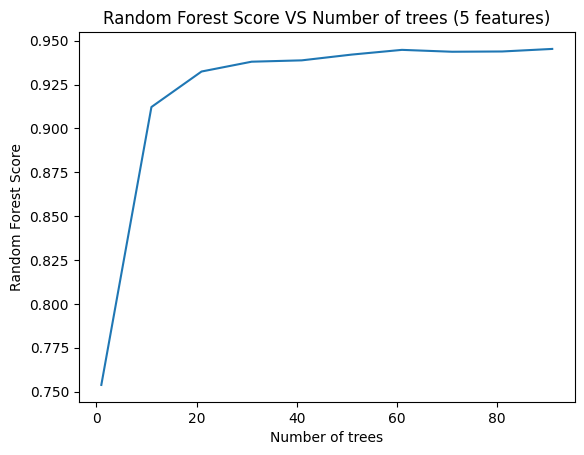

In [24]:
import matplotlib.pyplot as plt
opt_table_estimators=list()
n_features=5
n_estimators=100
for i in range(1,n_estimators,10):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,n_estimators,10), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [25]:
opt_table_estimators

[0.7538320049049663,
 0.9121704475781729,
 0.9324034334763949,
 0.9379981606376456,
 0.9387645616186389,
 0.9420600858369099,
 0.9447424892703863,
 0.9436695278969958,
 0.9438228080931944,
 0.9452789699570815]

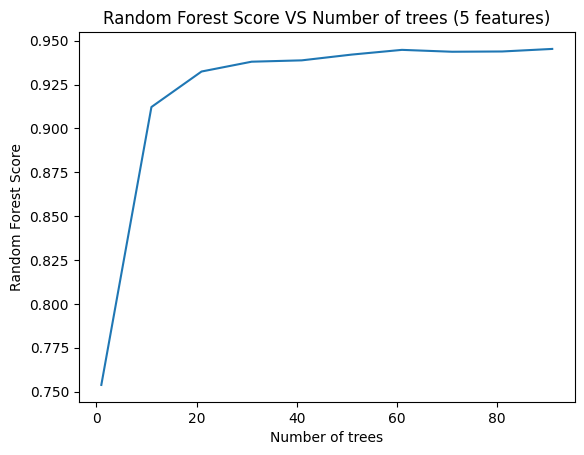

In [26]:
plt.plot(range(1,n_estimators,10), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1906192818.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1906192818.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1906192818.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1906192818.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

ValueError: x and y must have same first dimension, but have shapes (34,) and (5,)

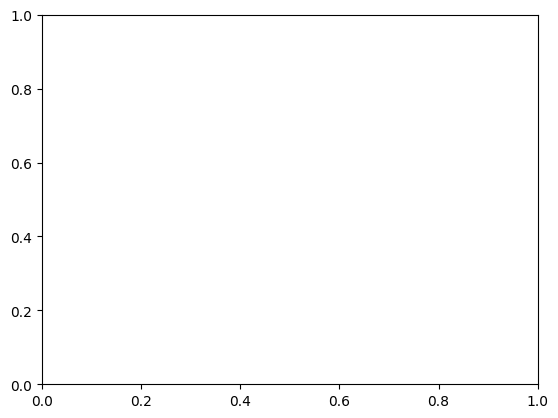

In [29]:
opt_table_n_features=list()
n_estimators= 15
n_features=500
for i in range(1,n_features, 100):
    forest=RFC(n_estimators=n_estimators,max_features=i)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_n_features.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,n_features,15), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

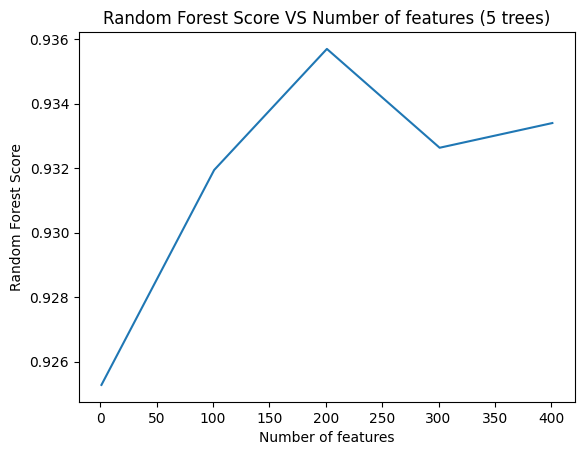

In [30]:
plt.plot(range(1,n_features,100), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

In [31]:


forest=RFC(n_estimators=500,max_features=200)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)



C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1587549318.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.9487277743715512

In [39]:


forest=RFC(n_estimators=1,max_features=5)
forest.fit(X_train,y_train)
output=forest.predict(X_test)
metrics.accuracy_score(y_test, output)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1208910725.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


0.7529123237277744

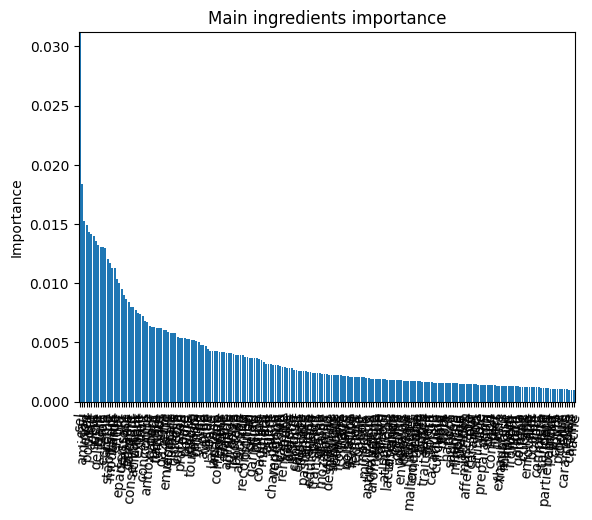

In [41]:
import numpy as np

importance = forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.001,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.iloc[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

In [38]:
y_train.values

array(['Snacking surgele', 'Plats cuisines ambiants',
       'Boissons Rafraichissantes Sans Alcool', ...,
       'Plats cuisines ambiants', 'Plats cuisines ambiants',
       'Jus et nectars'], dtype=object)

In [43]:
df_features.columns.values

array(['3_poivres', '5_epices', '5g_de_matiere_grasse_par_litre', ...,
       'zestes_de_mandarine', 'zinc', 'zygochlamys'], dtype=object)

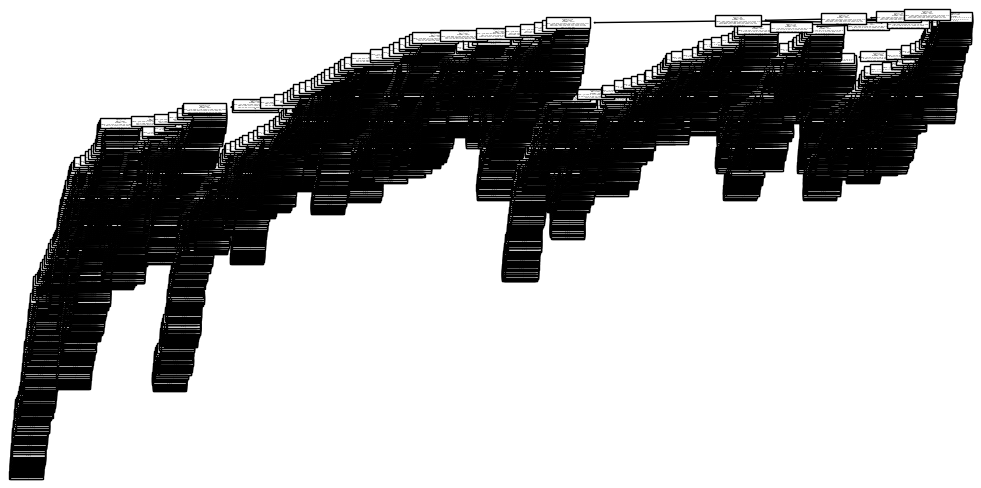

In [42]:
# Import `tree` module
from sklearn import tree

features = df_features.columns.values # The name of each column
classes = y_train.values # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in forest.estimators_:
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator)
    plt.show()

In [79]:
vectorizerCount.fit_transform(df[['Ingrédient']])

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [110]:
allDataVectorized

,0
0,"(0, 2092)\t2\n (0, 1369)\t1\n (0, 3046)\t1..."
1,"(0, 2092)\t2\n (0, 1369)\t1\n (0, 3374)\t1..."
2,"(0, 2092)\t2\n (0, 3374)\t1\n (0, 1662)\t2..."
3,"(0, 2092)\t2\n (0, 3374)\t1\n (0, 1437)\t1..."
4,"(0, 2092)\t1\n (0, 1369)\t1\n (0, 918)\t1\..."
...,...
46745,"(0, 3374)\t1\n (0, 1163)\t1\n (0, 2985)\t1..."
46746,"(0, 3374)\t1\n (0, 1163)\t3\n (0, 2985)\t3..."
46747,"(0, 3374)\t1\n (0, 1163)\t2\n (0, 2985)\t2..."
46748,"(0, 3374)\t1\n (0, 1163)\t1\n (0, 2985)\t2..."


In [180]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"lait ecreme reconstitue, sucre, fruit, creme, ..."
1,453,Produits laitiers et desserts frais,"yaourt au lait partiellement ecreme, sucre, si..."
2,455,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fruits, fruit, ..."
3,456,Produits laitiers et desserts frais,"yaourt au lait 1,1% mg, sucre, fraise, fructos..."
4,460,Produits laitiers et desserts frais,"lait ecreme pasteurise, creme pasteurisee, fer..."
...,...,...,...
46745,72338,Compotes,"puree de pommes, sucre, antioxydant"
46746,72339,Compotes,"puree de pommes, puree de fraises, sucre, pure..."
46747,72340,Compotes,"puree de pommes, puree de poires, sucre, antio..."
46748,72341,Compotes,"puree de pommes, puree d_abricots, sucre, anti..."


In [212]:
import shlex
# Instantiating the Vectorizer, experimenting with both
vectorizer = CountVectorizer(binary=True, tokenizer=shlex.split)
#vectorizer = TfidfVectorizer()

In [213]:
x = vectorizer.fit_transform(df["Ingrédient"])
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [214]:
df_wrds

,"(cabillaud,,","(lait,",",",0%,"0%mg,","0,","0,2%","0,4%","0,9%","00,",...,"yuzu,",zeste,"zeste,",zestes,"zestes,",zinc,"zinc,",zygochlamis,zygochlamys,"zygochlamys,"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df_wrds

,"0,2","0,4","0,9",00,"1,1","1,3","1,4",10,"10,",100,...,yakitori,yaourt,yoghourt,yogourt,yuzu,zeste,zestes,zinc,zygochlamis,zygochlamys
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(df['Ingrédient'])

In [40]:
a = bag_of_words.columns

In [41]:
print(a)

Index(['00', '10', '100', '11', '110', '11g', '11g_l', '14', '14g_l', '15',
       ...
       'yakitori', 'yaourt', 'yoghourt', 'yogourt', 'yuzu', 'zeste', 'zestes',
       'zinc', 'zygochlamis', 'zygochlamys'],
      dtype='object', length=3693)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",
                             ngram_range = (1,1), # unigrams
                             binary = True, #  (the default is counts)
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = ',',  
                             max_df = 0.99) # any word appearing in more than 99% of the sample will be discarded

In [16]:
vectorizer = CountVectorizer(stop_words=',')

In [27]:
X = vectorizer.transform(df['Ingrédient'])

NotFittedError: Vocabulary not fitted or provided

In [10]:
a

<46750x3693 sparse matrix of type '<class 'numpy.int64'>'
	with 1189027 stored elements in Compressed Sparse Row format>

In [22]:
df

,Code_produit,Secteur,Ingrédient
0,450,Produits laitiers et desserts frais,"{lait ecreme reconstitue, sucre, fruit, creme,..."
1,453,Produits laitiers et desserts frais,"{yaourt au lait partiellement ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,"{yaourt au lait 1,1% mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,"{lait ecreme pasteurise, creme pasteurisee, fe..."
...,...,...,...
46745,72338,Compotes,"{puree de pommes, sucre, antioxydant}"
46746,72339,Compotes,"{puree de pommes, puree de fraises, sucre, pur..."
46747,72340,Compotes,"{puree de pommes, puree de poires, sucre, anti..."
46748,72341,Compotes,"{puree de pommes, puree d_abricots, sucre, ant..."


Reduce overfitting in Radnom Forest

In [43]:
model = RFC()
model.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\2043171825.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy :  99.908024833295
Validation Accuracy :  94.53556100551809


In [44]:
model = RFC(max_depth=2, random_state=22)
model.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\635317696.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy :  28.393500421552847
Validation Accuracy :  28.065603923973022


In [45]:
model = RFC(n_estimators=30, random_state=22)
model.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\1125223969.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy :  99.9041925346823


NameError: name 'Y_val' is not defined

In [46]:
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

Validation Accuracy :  93.91477621091356


Random Forest Hyperparameter Tuning

1. n_estimators
Random Forest is nothing but a set of trees. It is an extended version of the Decision Tree in a very optimized way. One issue here might arise is how many trees need to be created. n_estimator is the hyperparameter that defines the number of trees to be used in the model. The tree can also be understood as the sub-divisions. 
The Nº of Decision Trees in the forest

The criteria with which to split on each node (Gini or Entropy for a classification task, or the MSE or MAE for regression)

2. max_features
In order to train the Machine learning model, the given dataset should contain multiple features/variables to predict the label/target. Max_features limits a count to select the maximum features in each tree. 
Number of random features to include at each node for splitting.

3. max_depth
A tree is incomplete without a split or child node. max_depth determines the maximum number of splits each tree can take. If the max_depth is too low, the model will be trained less and have a high bias, leading the model to underfit. In the same way, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit.
The maximum depth of the individual trees. The larger an individual tree, the more chance it has of overfitting the training data, however, as in Random Forests we have many individual trees, this is not such a big problem.

4. max_leaf_nodes
We have a tree and know what max_depth is used for. Talking of a Tree, each tree is used to split into multiple nodes. But how many divisions of nodes should be done is specified by max_lead_nodes. max_leaf_nodes restricts the growth of each tree. 
Maximum number of leaf nodes. In Random Forest this is not so important, but in an individual Decision Tree it can greatly help reduce over-fitting as well and also help increase the explainability of the tree by reducing the possible number of paths to leaf nodes. Learn how to use Decision Trees to build explainable ML models here.

5. max_sample
Apart from the features, we have a large set of training datasets. max_sample determines how much of the dataset is given to each individual tree. 

6. min_sample_split
Since ensemble algorithms are weak learners and are derived from strong learners, Random Forest which is a Weak Learner depends on Decision Tree decisions.  min_sample_split determines the minimum number of decision tree observations in any given node in order to split. 
The minimum samples to split on at an internal node of the trees. Playing with this parameter and the previous one we could regularise the individual trees if needed.

The size of the bootstrapped dataset to train each Decision Tree with.

Nº of Trees in the forest:

By building forests with a large number of trees (high number of estimators) we can create a more robust aggregate model with less variance, at the cost of a greater training time. Most times the secret here is to evaluate your data: how much data is available, and how many features does each observation have.

Because of the randomness of Random Forest, if you have a lot of features and a small number of trees some features with high predictive power could get left out of the forest and not be used whatsoever, or be used very little.

The same applies for the data: if you have a lot of observations and you are not using the whole dataset to train each tree, if you have a small number of trees, then some observations could be left out.

As Random Forests rarely overfit, in practice you can use a large number of trees to avoid these problems, and get good results following the guideline that when all other hyper-parameters are fixed, increasing the number of trees generally reduces model error at the cost of a higher training time.

Don’t be fooled by this statement though, building a forest with 10K trees is a crazy and useless approach: the main takeaway is that as you increase the nº of trees you will be reducing model variance and generally model error would approximate an optimum value.

Conclusion: fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.

In [ ]:
import matplotlib.pyplot as plt
opt_table_estimators=list()
n_features=5
n_estimators=50
for i in range(1,n_estimators,5):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,n_estimators,5), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()


We can see that we can take a number of tree of 25 for the rest of the project to tune other hyperparameters

The Criteria on which to split on at each node of the trees:

Having said this, Gini is usually less computationally expensive to calculate as it does not compute a logarithm. The Scikit-Learn implementation of RandomForestClassifier allows us to choose from both, so it might be worth trying both measures and seeing which leads to an smaller error.

Conclusion: fine tuning the split criteria could lead to different forests, and as there is only two possible values, we recommend trying them both for classification forests.

The Maximum Depth of the Individual Trees :

Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account.

In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values.

This parameter should be set to a reasonable amount depending on the number of features of your tree: don’t build stumps (really shallow trees) nor insanely big trees; set this parameter to a reasonable amount and tune it a little bit if you want, but changes around a reasonable value do not impact the performance of your forest greatly, so you don’t have to include it in a procedure like Grid Search if you don’t want.

Conclusion: fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\4028855377.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\4028855377.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\4028855377.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\4028855377.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

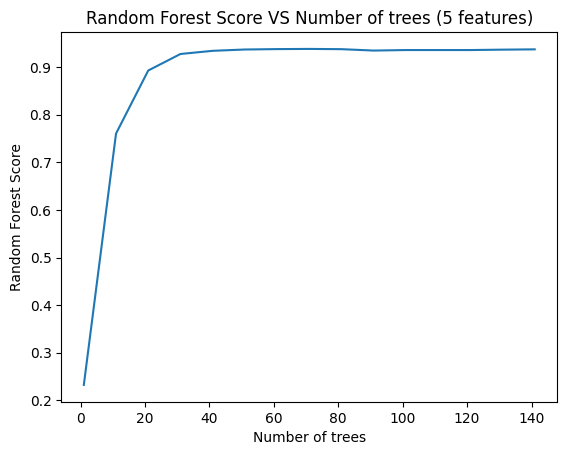

In [64]:
import matplotlib.pyplot as plt
opt_table_estimators=list()
n_features=5
max_depth =150
n_estimators = 25
for i in range(1,max_depth,10):
    forest=RFC(max_depth=i, n_estimators=n_estimators)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,max_depth,10), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

max_depth = 50

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\520183664.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\520183664.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\520183664.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_21864\520183664.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

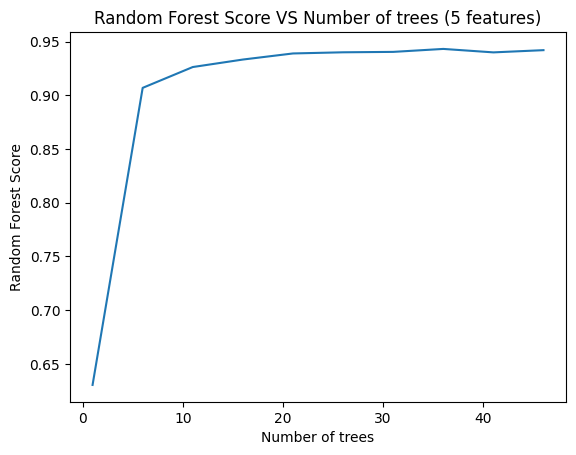

In [81]:
import matplotlib.pyplot as plt
opt_table_estimators=list()
n_features=50
max_depth =50
n_estimators = 50
for i in range(1,50,5):
    forest=RFC(max_depth=max_depth, n_estimators=n_estimators, max_features = i)
    forest.fit(X_train,y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(y_test, output))
plt.plot(range(1,50,5), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [78]:
opt_table_estimators

[0.5888258736971184]

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

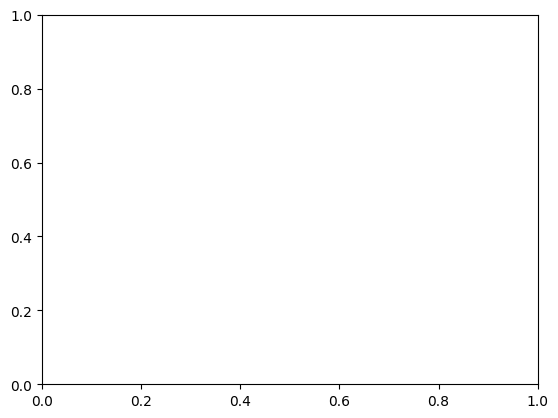

In [82]:
plt.plot(range(1,10,2), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [83]:
opt_table_estimators

[0.6304414469650521,
 0.9069589209074188,
 0.9263488657265482,
 0.9333231146535867,
 0.9389944819129369,
 0.9400674432863274,
 0.9404506437768241,
 0.9432096873083997,
 0.939990803188228,
 0.9420600858369099]

In [84]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50],
    'max_features': [20],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50]
}# Create a based model
rf = RFC()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [85]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50],
                         'max_features': [20], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50]},
             verbose=2)

In [87]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [91]:
best_grid = grid_search.best_estimator_

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

grid_accuracy = evaluate(best_grid, X_test,y_test)

ValueError: Unable to coerce to Series, length must be 1: given 13048

In [93]:
best_grid 

RandomForestClassifier(max_depth=50, max_features=20, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=50)

In [96]:
output=forest.predict(X_test)
opt_table_estimators.append(metrics.accuracy_score(y_test, output))

In [97]:
opt_table_estimators

[0.6304414469650521,
 0.9069589209074188,
 0.9263488657265482,
 0.9333231146535867,
 0.9389944819129369,
 0.9400674432863274,
 0.9404506437768241,
 0.9432096873083997,
 0.939990803188228,
 0.9420600858369099,
 0.9420600858369099,
 0.9420600858369099]

Which hyperparameters are most important to tune for random forests?

Which hyperparameters are most important to use when you are building a random forest model? Here are the hyperparameters that are most important to tune for most models.

    Number of trees. The first parameter that you should tune when building a random forest model is the number of trees. In general, values in the range of 50 to 400 trees tend to produce good predictive performance.
    Number of features considered at each split (mtry). The number of features considered at each split is another parameter that should be tuned when building a random forest model. There are a few common heuristics that can help you select values to try for this parameter. Two common examples are the square root of the total number of features and one third of the total number of features.
    A parameter that controls tree depth. You should also tune exactly one parameter that controls the depth that trees can grow to. This could include the maximum tree depth, the maximum number of leaf nodes, the maximum number of samples required to create a new split, or the minimum number of samples that can be in a leaf node. Make sure to include at least one or two values that will produce small trees with no more than a few splits. You will often see good results from using a large collection of shallow trees with only 1 or 2 splits. It is common to see diminishing returns after a tree has grown 10 or 20 layers deep.

Advantages

    Works more efficiently for a large range of data items than a single decision tree. 
    They are very flexible and deliver highly accurate results.
    They have much less variance when compared to a single decision tree. 
    Even in the face of disruptions, especially when large sets of data go missing, random forests can still maintain good accuracy. 

Disadvantages

    Random Forests algorithms usually involve a lot of complexities. 
    Constructing Random forests usually requires much more time and effort than decision trees.
    They tend to be less intuitive especially when there is a large collection of decision trees involved. 
    Usually involves many computational resources for the implementation of the Random tree algorithm.
